In [1]:

# Fix markers or kind, error bars

%matplotlib inline
# Dependencies and Setup
# get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data = "data/mouse_drug_data.csv"
clinical_trial_data = "data/clinicaltrial_data.csv"
drug_df = pd.read_csv(mouse_drug_data)
trial_df = pd.read_csv(clinical_trial_data)
drugtrial_df = pd.merge(drug_df, trial_df, on="Mouse ID")
drugtrial_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [100]:

# In[3]:
# Tumor Response to Treatment
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
Avg_Tumor_Volume = drugtrial_df.groupby(["Drug", "Timepoint"]).agg(['mean', 'sem'])
Avg_Tumor_Volume = Avg_Tumor_Volume.reset_index()
Avg_Tumor_Volume = Avg_Tumor_Volume.drop("Metastatic Sites", axis=1)
sem = Avg_Tumor_Volume['Tumor Volume (mm3)']['sem']



In [91]:
# In[5]:
# Minor Data Munging to Re-Format the Data Frames
Table = Avg_Tumor_Volume.pivot_table(index="Timepoint",
                                     values="Tumor Volume (mm3)",
                                     columns="Drug")
Table.head()


mean                                                         \
Drug       Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol    Placebo   
Timepoint                                                                     
0          45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
5          44.266086  46.503051  47.062001  47.389175  46.796098  47.125589   
10         43.084291  48.285125  49.403909  49.582269  48.694210  49.423329   
15         42.064317  50.094055  51.296397  52.399974  50.933018  51.359742   
20         40.716325  52.157049  53.197691  54.920935  53.644087  54.364417   

                                                            sem            \
Drug        Propriva   Ramicane   Stelasyn  Zoniferol Capomulin  Ceftamin   
Timepoint                                                                   
0          45.000000  45.000000  45.000000  45.000000  0.000000  0.000000   
5          47.248967  43.944859  47.527452  46.851818  0.448593  0.164505   
10         49.101541  42.531957  49.463844  48.689881  0.702684  0.236144   
15         51.067318  41.495061  51.529409  50.779059  0.838617  0.332053   
20         53.346737  40.238325  54.067395  53.170334  0.909731  0.359482   

                                                                       \
Drug      Infubinol  Ketapril  Naftisol   Placebo  Propriva  Ramicane   
Timepoint                                                               
0          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5          0.235102  0.264819  0.202385  0.218091  0.231708  0.482955   
10         0.282346  0.357421  0.319415  0.402064  0.376195  0.720225   
15         0.357705  0.580268  0.444378  0.614461  0.466109  0.770432   
20         0.476210  0.726484  0.595260  0.839609  0.555181  0.786199   

                               
Drug       Stelasyn Zoniferol  
Timepoint                      
0          0.000000  0.000000  
5          0.239862  0.188950  
10         0.433678  0.263949  
15         0.493261  0.370544  
20         0.621889  0.533182

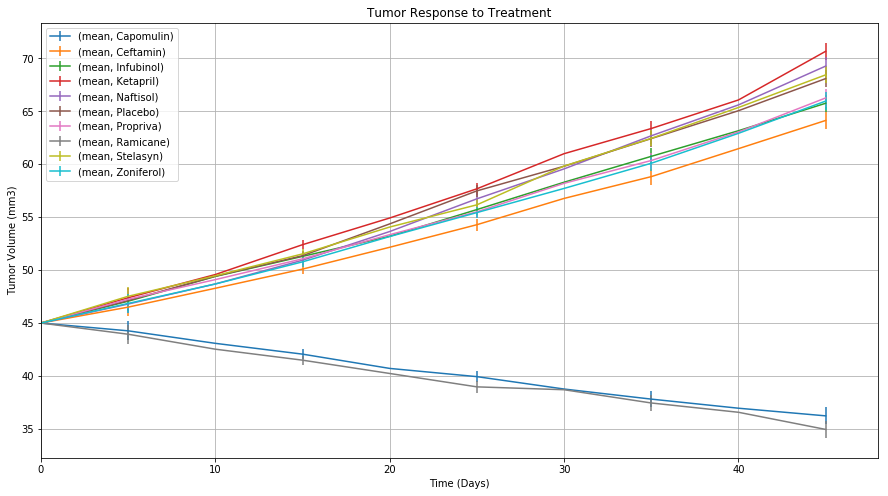

In [104]:

# In[6]:
styles = ["o", ".", ",", "v", "1", "8", "s", "*", "+","|"]
fig, ax = plt.subplots()
for col, style in zip(Table.columns, styles):
    Table[col].plot(kind="line", linestyle="-", style=style, ax=ax,
                    figsize=(15, 8), xlim=(0, 48), grid=True, yerr=sem)
ax.legend(loc="Best")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Tumor Response to Treatment")
ax.set_figsize = (15, 8)
plt.savefig('Tumor_Responses.png')

In [112]:
# Metastatic Response to Treatment
# Store the Mean Met. Site Data Grouped by Drug and Timepoint
Metastatic_Sites = drugtrial_df.groupby(["Drug", "Timepoint"]).agg(['mean', 'sem'])
Metastatic_Sites = Metastatic_Sites.drop("Tumor Volume (mm3)", axis=1)
Metastatic_Sites = Metastatic_Sites.reset_index()
sem = Metastatic_Sites['Metastatic Sites']['sem']
Metastatic_Sites.head()

Drug Timepoint Metastatic Sites          
                                   mean       sem
0  Capomulin         0         0.000000  0.000000
1  Capomulin         5         0.160000  0.074833
2  Capomulin        10         0.320000  0.125433
3  Capomulin        15         0.375000  0.132048
4  Capomulin        20         0.652174  0.161621

In [108]:

# In[10]:
Table = Metastatic_Sites.pivot_table(index="Timepoint",
                                     values="Metastatic Sites",
                                     columns="Drug")
Table.head()

mean                                                    \
Drug      Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                               
0          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5          0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10         0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15         0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20         0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   

                                                        sem            \
Drug       Propriva  Ramicane  Stelasyn Zoniferol Capomulin  Ceftamin   
Timepoint                                                               
0          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5          0.320000  0.120000  0.240000  0.166667  0.074833  0.108588   
10         0.565217  0.250000  0.478261  0.500000  0.125433  0.152177   
15         0.764706  0.333333  0.782609  0.809524  0.132048  0.180625   
20         1.000000  0.347826  0.952381  1.294118  0.161621  0.241034   

                                                                       \
Drug      Infubinol  Ketapril  Naftisol   Placebo  Propriva  Ramicane   
Timepoint                                                               
0          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5          0.091652  0.098100  0.093618  0.100947  0.095219  0.066332   
10         0.159364  0.142018  0.163577  0.115261  0.105690  0.090289   
15         0.194015  0.191381  0.158651  0.190221  0.136377  0.115261   
20         0.234801  0.236680  0.181731  0.234064  0.171499  0.119430   

                               
Drug       Stelasyn Zoniferol  
Timepoint                      
0          0.000000  0.000000  
5          0.087178  0.077709  
10         0.123672  0.109109  
15         0.153439  0.111677  
20         0.200905  0.166378

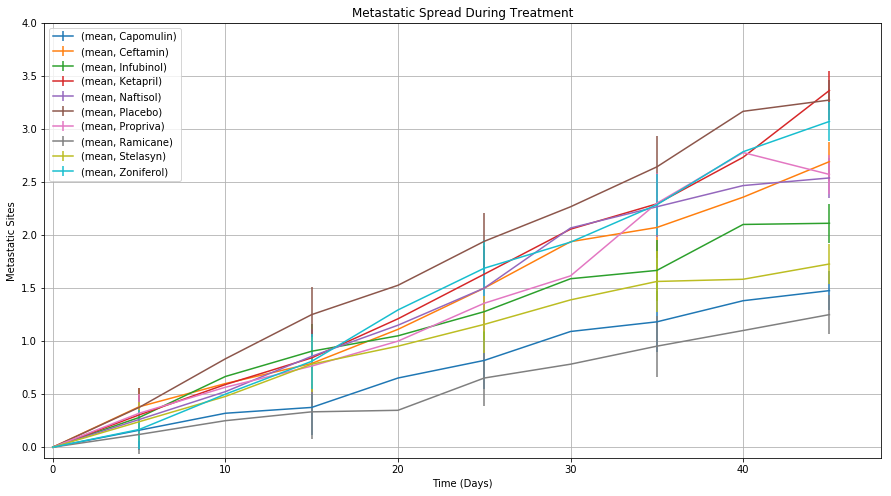

In [109]:
fig, ax = plt.subplots()
for col, style in zip(Table.columns, styles):
    Table[col].plot(linestyle="-", style=style, ax=ax,
                    figsize=(15, 8), xlim=(-0.5, 48),
                    grid=True, ylim=(-0.1, 4), yerr=sem)
ax.legend(loc="Best")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Metastatic Sites")
ax.set_title("Metastatic Spread During Treatment")
ax.set_figsize = (15, 8)
plt.savefig('Metastatic_Sites.png')

In [11]:

# In[13]:
# Survival Rates
Mouse_Count = drugtrial_df.groupby(["Drug", "Timepoint"]).count()
Mouse_Count = Mouse_Count.drop(["Metastatic Sites",
                                "Tumor Volume (mm3)"], axis=1)
Mouse_Count = Mouse_Count.reset_index()
Mouse_Count.head()


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [125]:
# In[15]:
Mouse_pct = Mouse_Count.groupby(['Drug', 'Timepoint']).agg({'Mouse ID': 'sum'})
Mouse_pct = round(Mouse_pct.div(Mouse_pct.groupby('Drug').first()) * 100, 2)
Mouse_pct = Mouse_pct.rename(columns={'Mouse ID': 'Percent Alive'})

Mouse_pct.head()

Percent Alive
Drug      Timepoint               
Capomulin 0                  100.0
          5                  100.0
          10                 100.0
          15                  96.0
          20                  92.0

In [126]:
# In[16]:


# Minor Data Munging to Re-Format the Data Frames
Table = Mouse_pct.pivot_table(index="Timepoint",
                              values='Percent Alive', columns="Drug")
Table.head()





Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.00,100.0,100.00,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.15,100.0,96.15,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.46,96.0,88.46,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.38,96.0,88.46,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.38,92.0,80.77,68.0


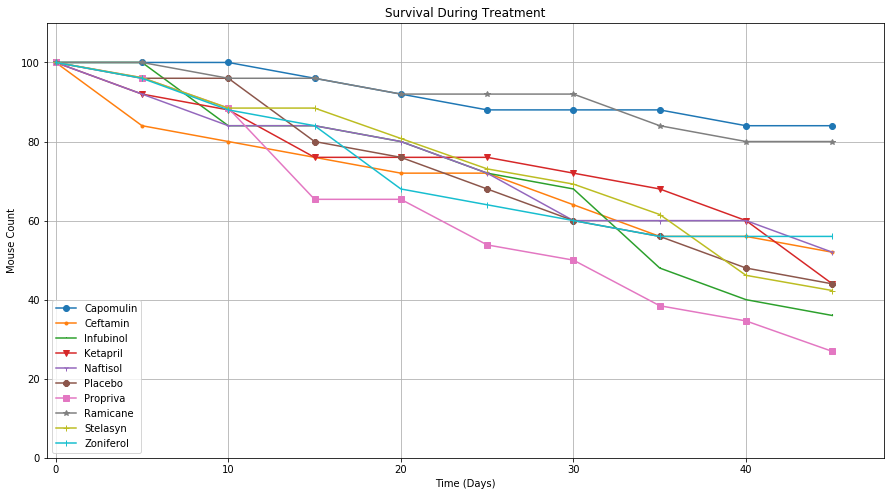

In [20]:
# In[17]:
fig, ax = plt.subplots()
for col, style in zip(Table.columns, styles):
    Table[col].plot(linestyle="-", style=style, ax=ax,
                    figsize=(15, 8), xlim=(-0.5, 48), grid=True, ylim=(0, 110))
ax.legend(loc="Best")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Mouse Count")
ax.set_title("Survival During Treatment")
ax.set_figsize = (15, 8)
plt.savefig('Survival Rate.png')


In [138]:
# Calculate the percent changes for each drug
Avg_Tumor_Volume = drugtrial_df.groupby(["Drug", "Timepoint"]).agg(['mean','sem'])
Tumor_Change = Avg_Tumor_Volume.pivot_table(index="Timepoint",
                                            values='Tumor Volume (mm3)',
                                            columns="Drug")
Tumor_Change = round(Tumor_Change.pct_change(), 4)
Tumor_Change = Tumor_Change.fillna(0)
Tumor_Change = Tumor_Change.tail(1)
Tumor_Change = Tumor_Change.stack()
Tumor_Change = Tumor_Change.reset_index(level=0, drop=True)
Sem = Tumor_Change['sem']
Tumor_Change.head(15)



,mean,sem
Drug,,
Capomulin,-0.0195,0.0003
Ceftamin,0.0433,0.2736
Infubinol,0.0410,0.0845
Ketapril,0.0695,0.2544
Naftisol,0.0559,0.2662
Placebo,0.0466,-0.0138
Propriva,0.0510,0.2069
Ramicane,-0.0443,0.0872
Stelasyn,0.0472,0.1178


In [133]:
Pct_Changed = sorted(tuple(zip(Tumor_Change['mean'], Tumor_Change.index)))
Efficacy, Drug = zip(*Pct_Changed)

colors = []
for value in Efficacy:
    if value > 0:
        colors.append('r')
    else:
        colors.append('g')



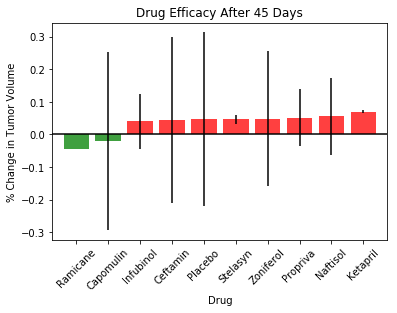

In [137]:
# In[62]:
tick_locations = []
x_axis = np.arange(0, len(Drug))
for x in x_axis:
    tick_locations.append(x)
ax = plt.bar(Drug, Efficacy, color=colors, alpha=0.75, align="center", yerr=Sem)

plt.title("Drug Efficacy After 45 Days")
plt.xlabel("Drug")
plt.ylabel("% Change in Tumor Volume")
plt.xlim(-0.75, len(Drug)-.25)
plt.hlines(0, -0.75, len(Drug))
plt.xticks(tick_locations, Drug, rotation=45)
plt.savefig('Drug_Efficacy.png')


fig.show()